# Exercise 1: Explore CNNs  
## Train the CNN models on Fashion-MNIST dataset.  

In this tutorial, we'll build and train a convolutional neural network to classify images of clothing, like sneakers and shirts. 
This guide uses [tf.keras](https://www.tensorflow.org/beta/guide/keras/overview), a high-level API to build and train models in TensorFlow.


Before running any code, we do the following two steps:
1. Reset the runtime by going to **Runtime -> Reset all runtimes** in the menu above. 
2. Select **GPU** by going to **Runtime -> Change runtime type -> Hardware accelerator** in the menu above. 


## [Install and import dependencies]

Since we need to use the latest tensorflow version, which is Tensorflow 2.0 beta. We need to install it. The default Tensorflow version in Colab is r1.14.0. 

In [42]:
 ## Install tensorflow 2.0.0 beta version (GPU VERSION)
 !pip install tensorflow-gpu==2.0.0-beta1 

In [43]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and Fashion-MNIST Datasets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-beta1


In [0]:
# To ignore some warning message
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## [Data Loading]  

**Fashion MNIST** has the same data structure as the regular **MNIST** dataset, but it's a slightly more challenging. 


In [45]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

#count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Train labels:  {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}
Test labels:  {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

### Data Preparation  

The value of each pixel in the image data is an integer in the range `[0,255]`. For the model to work properly, these values need to be normalized to the range `[0,1]`. 

In [0]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
# resize and normalize

x_train = np.reshape(x_train, [-1, image_size,image_size,1])
x_test = np.reshape(x_test, [-1, image_size,image_size,1])
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [0]:
# compute the number of labels
num_labels = len(np.unique(y_train))
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

##[Construct the Model]  
Building the neural network requires configuring the layers of the model, then compiling the model.  
We build a stack of two CNN-RELU-MaxPooling model.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(filters=filters,
                       kernel_size=kernel_size,
                       activation='relu',
                       input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size))
model.add(layers.Conv2D(filters=filters,
                       kernel_size=kernel_size,
                       activation='relu',))
model.add(layers.MaxPooling2D(pool_size))
model.add(layers.Flatten())
model.add(layers.Dropout(dropout))
model.add(layers.Dense(num_labels))
model.add(layers.Activation('softmax'))

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:


* *Loss function* — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
* *Optimizer* —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##[Train the Model]  

In [52]:
EPOCHS=20
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=EPOCHS, batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5987 - accuracy: 0.7830 - val_loss: 0.4405 - val_accuracy: 0.8359
Epoch 2/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3870 - accuracy: 0.8623 - val_loss: 0.3696 - val_accuracy: 0.8703
Epoch 3/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3473 - accuracy: 0.8761 - val_loss: 0.3381 - val_accuracy: 0.8809
Epoch 4/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3183 - accuracy: 0.8857 - val_loss: 0.3213 - val_accuracy: 0.8883
Epoch 5/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2986 - accuracy: 0.8920 - val_loss: 0.3058 - val_accuracy: 0.8913
Epoch 6/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2817 - accuracy: 0.8972 - val_loss: 0.2906 - val_accuracy: 0.8965
Epoch 7/20
60000/60000 [==============================] 

### Visualize the training process   
Here, we visualize the training process to have a better understanding of our model.
To see the performance of our model, and get some insights on how to tune our model for better performance.

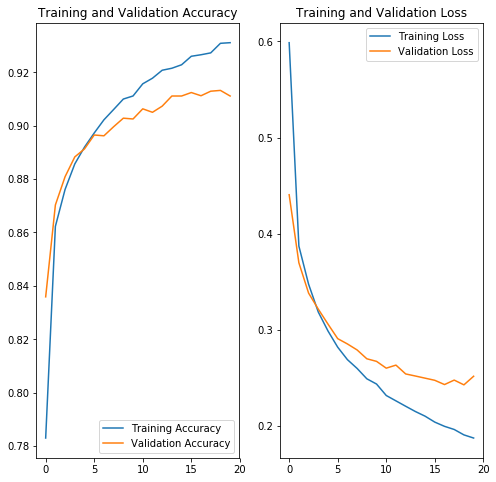

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./cnn.png')
plt.show()